- come combinare la grid search con la pipeline (e in automatico cross validation)
- esempio sentiment analysis
- settare gli iperparametri degli step della pipeline
- skippare o includere gli step della pipeline

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.datasets import fetch_california_housing

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Normalizer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

from sklearn import set_config
set_config(display='diagram')

In [2]:
X, y = fetch_california_housing(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
steps = [
    ( 'scaler', MinMaxScaler() ),
    ( 'normalizer', Normalizer() ),
    ( 'model', KNeighborsRegressor() )
]

In [5]:
pipeline = Pipeline(steps)

In [6]:
pipeline

Pipeline(steps=[('scaler', MinMaxScaler()), ('normalizer', Normalizer()),
                ('model', KNeighborsRegressor())])

non fittiamo la pipeline, prepariamo la grid

In [7]:
pipeline['scaler'].get_params()

{'copy': True, 'feature_range': (0, 1)}

In [8]:
pipeline['normalizer'].get_params()

{'copy': True, 'norm': 'l2'}

In [9]:
pipeline['model'].get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [10]:
params_space = {
    # '<step>__<param>'
    'scaler__feature_range': [(0,1), (-1,1)],
    'normalizer': [ Normalizer(), None ], # toggle transformer altogether
    'model__n_neighbors': [2, 4, 6, 8, 10]
}

In [11]:
grid = GridSearchCV(pipeline, param_grid=params_space, cv=5, verbose=1)

In [12]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.4s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('normalizer', Normalizer()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [2, 4, 6, 8, 10],
                         'normalizer': [Normalizer(), None],
                         'scaler__feature_range': [(0, 1), (-1, 1)]},
             verbose=1)

In [13]:
grid.best_params_

{'model__n_neighbors': 10, 'normalizer': None, 'scaler__feature_range': (0, 1)}

In [14]:
results = pd.DataFrame(grid.cv_results_)

In [15]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,param_normalizer,param_scaler__feature_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018310,0.001403,0.038033,0.004467,2,Normalizer(),"(0, 1)","{'model__n_neighbors': 2, 'normalizer': Normal...",0.553436,0.608841,0.597779,0.537051,0.566389,0.572699,0.026896,20
1,0.017294,0.000093,0.076745,0.007403,2,Normalizer(),"(-1, 1)","{'model__n_neighbors': 2, 'normalizer': Normal...",0.635815,0.647700,0.676509,0.640096,0.639331,0.647890,0.014825,16
2,0.015201,0.000308,0.075883,0.016325,2,None,"(0, 1)","{'model__n_neighbors': 2, 'normalizer': None, ...",0.630555,0.657882,0.667888,0.627792,0.646962,0.646216,0.015434,17
3,0.015112,0.000223,0.075884,0.016884,2,None,"(-1, 1)","{'model__n_neighbors': 2, 'normalizer': None, ...",0.630555,0.657882,0.667888,0.627792,0.646962,0.646216,0.015434,17
4,0.017622,0.001022,0.044704,0.003550,4,Normalizer(),"(0, 1)","{'model__n_neighbors': 4, 'normalizer': Normal...",0.618786,0.660243,0.648251,0.613309,0.623208,0.632760,0.018222,19


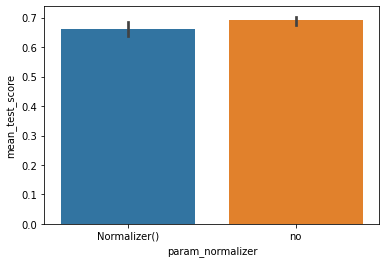

In [16]:
results['param_normalizer'].fillna('no', inplace=True)
sns.barplot(data=results, x='param_normalizer', y='mean_test_score')

Esercizio: usare altri modelli (es. rete neurale)